<div class="alert alert-info">

### This is a Jupyter notebook

You can learn all about the Jupyter interface [here](https://realpython.com/jupyter-notebook-introduction/)

Some basics: 
Jupyter has two modes: command and edit. When you click a cell, you enter ```edit mode``` and you can edit its contents. To exit ```edit mode```, you press ```ESC```.

* Cells can be either code cells or text (or markdown) cells
* To run cells, press Shift+enter 
* To turn a cell into a text cell, press `m` (markdown) in command mode
* To create a new cell use `b` (new cell below) or `a` (above) in command mode

</div>

# Testing counts in cells

## generate artificial data

In [44]:


# lets create 9 cells per condition (KO ; rescued) with 2 data points each 
# (# lisossomes, # lisossomes w/ M2) 

n_cells = 9
mean_liso = 30
p_M2 = .1
p_resc = .05

n_lisosomes_KO = rpois(n=n_cells,lambda = mean_liso)
n_lisosomes_Resc = rpois(n=n_cells,lambda = mean_liso)
n_overlaps_KO = vector()
n_overlaps_Resc = vector()
for(i in 1:length(n_lisosomes)){
    n_overlaps_KO = c(n_overlaps_KO, rbinom(n=1,size = n_lisosomes_KO[i],prob = p_M2) )
    n_overlaps_Resc = c(n_overlaps_Resc, rbinom(n=1,size = n_lisosomes_Resc[i],prob = p_resc) )
}

In [45]:
fake_real_data = data.frame(lisossomes=c(n_lisosomes_KO,n_lisosomes_Resc),overlaps = c(n_overlaps_KO,n_overlaps_Resc),type = c(rep("KO",n_cells),rep("Rescue",n_cells)) )

In [46]:
fake_real_data

lisossomes,overlaps,type
29,4,KO
29,4,KO
29,1,KO
27,1,KO
26,3,KO
45,4,KO
44,6,KO
31,6,KO
26,1,KO
28,1,Rescue


## a bootstrap approach to calculate power for count data

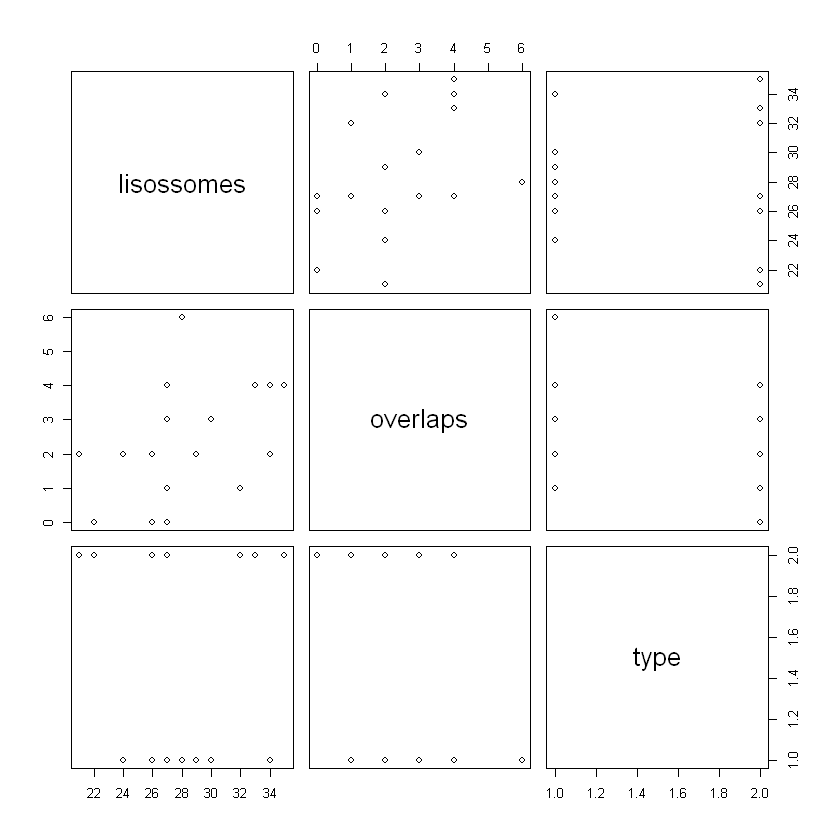

In [26]:
plot(fake_real_data)

### Are total numbers statistically different?

In [47]:
li_KO = which(fake_real_data[,"type"]=="KO")
li_Resc = which(fake_real_data[,"type"]=="Rescue")

In [48]:
wilcox.test(fake_real_data[li_KO,"lisossomes"],fake_real_data[li_Resc,"lisossomes"])

Warning message in wilcox.test.default(fake_real_data[li_KO, "lisossomes"], fake_real_data[li_Resc, :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  fake_real_data[li_KO, "lisossomes"] and fake_real_data[li_Resc, "lisossomes"]
W = 46, p-value = 0.656
alternative hypothesis: true location shift is not equal to 0


In [49]:
wilcox.test(fake_real_data[li_KO,"overlaps"],fake_real_data[li_Resc,"overlaps"])

Warning message in wilcox.test.default(fake_real_data[li_KO, "overlaps"], fake_real_data[li_Resc, :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  fake_real_data[li_KO, "overlaps"] and fake_real_data[li_Resc, "overlaps"]
W = 59, p-value = 0.09346
alternative hypothesis: true location shift is not equal to 0


In [ ]:
calc_p = function(overlaps,total)overlaps/total 

fake_real_data = cbind(fake_real_data, apply(fake_real_data[,c("overlaps","lisossomes")],1,function(x) calc_p(x[1],x[2]) )
)
names(fake_real_data)[4] = "p"


### generate a (bootstrapped) nul distribution

Because the number of lisossomes is not different between the two groups,

In [55]:
p_KO = mean(fake_real_data[li_KO,"p"])
p_KO



[1] 0.1022254

In [51]:
fake_real_data

lisossomes,overlaps,type,p
29,4,KO,0.13793103
29,4,KO,0.13793103
29,1,KO,0.03448276
27,1,KO,0.03703704
26,3,KO,0.11538462
45,4,KO,0.08888889
44,6,KO,0.13636364
31,6,KO,0.19354839
26,1,KO,0.03846154
28,1,Rescue,0.03571429


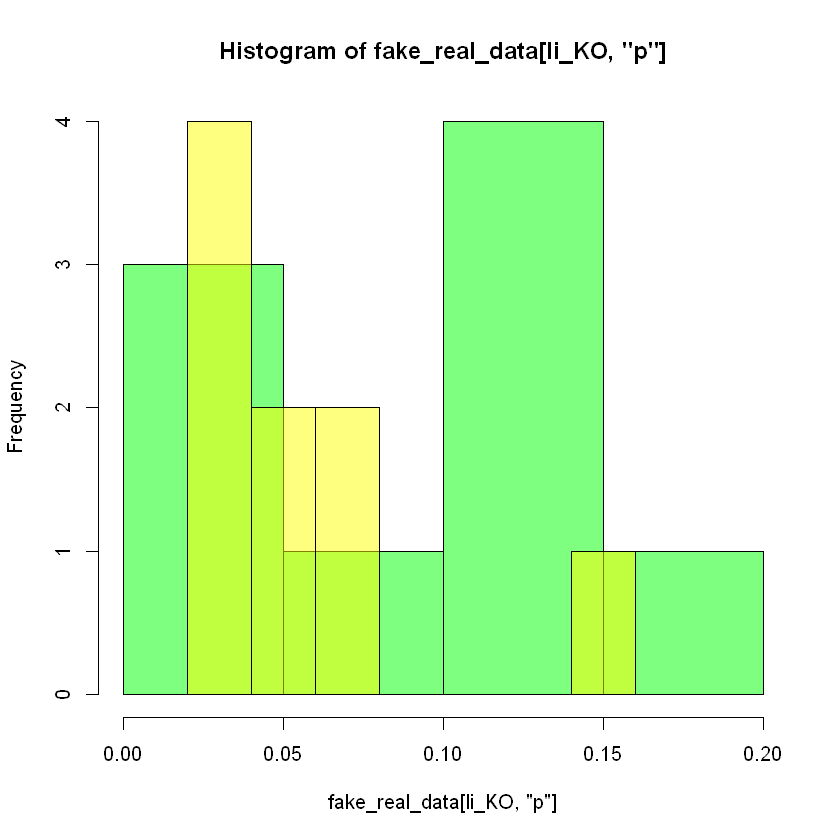

In [69]:
hist(fake_real_data[li_KO,"p"],col=rgb(0, 1, 0, 0.5))
hist(fake_real_data[li_Resc,"p"],col=rgb(1, 1, 0, 0.5),add=TRUE)


In [86]:
control.proptest = prop.test(x = fake_real_data[li_KO,"overlaps"],n=fake_real_data[li_KO,"lisossomes"])
rescue.proptest = prop.test(x = fake_real_data[li_Resc,"overlaps"],n=fake_real_data[li_Resc,"lisossomes"])

(control.proptest)

(rescue.proptest)

Warning message in prop.test(x = fake_real_data[li_KO, "overlaps"], n = fake_real_data[li_KO, :
"Chi-squared approximation may be incorrect"Warning message in prop.test(x = fake_real_data[li_Resc, "overlaps"], n = fake_real_data[li_Resc, :
"Chi-squared approximation may be incorrect"


	9-sample test for equality of proportions without continuity
	correction

data:  fake_real_data[li_KO, "overlaps"] out of fake_real_data[li_KO, "lisossomes"]
X-squared = 7.964, df = 8, p-value = 0.437
alternative hypothesis: two.sided
sample estimates:
    prop 1     prop 2     prop 3     prop 4     prop 5     prop 6     prop 7 
0.13793103 0.13793103 0.03448276 0.03703704 0.11538462 0.08888889 0.13636364 
    prop 8     prop 9 
0.19354839 0.03846154 



	9-sample test for equality of proportions without continuity
	correction

data:  fake_real_data[li_Resc, "overlaps"] out of fake_real_data[li_Resc, "lisossomes"]
X-squared = 5.1394, df = 8, p-value = 0.7426
alternative hypothesis: two.sided
sample estimates:
    prop 1     prop 2     prop 3     prop 4     prop 5     prop 6     prop 7 
0.03571429 0.04545455 0.03448276 0.14285714 0.05882353 0.07407407 0.03333333 
    prop 8     prop 9 
0.03333333 0.07142857 


In [85]:
rescue.proptest['conf.int']

$conf.int
NULL


In [53]:
if(!require(PropCIs)){install.packages("PropCIs")}

if(!require(DescTools)){install.packages("DescTools")}

Loading required package: PropCIs
Loading required package: DescTools
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'DescTools'"also installing the dependencies 'mvtnorm', 'expm'



package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'expm' successfully unpacked and MD5 sums checked
package 'DescTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\t.paixao\AppData\Local\Temp\Rtmp4qT3e2\downloaded_packages


In [127]:
calc_p = function(overlaps,total) overlaps/total 


gen_sample = function(mean_liso,n_cells,p_M2,p_Resc){

#     dfs = data.frame()
#     for( i in 1:samp){
        n_lisosomes_KO = rpois(n=n_cells,lambda = mean_liso)
        n_lisosomes_Resc = rpois(n=n_cells,lambda = mean_liso)

        n_overlaps_KO = vector()
        n_overlaps_Resc = vector()

        for(i in 1:n_cells){
            n_overlaps_KO = c(n_overlaps_KO, rbinom(n=1,size = n_lisosomes_KO[i],prob = p_M2) )
            n_overlaps_Resc = c(n_overlaps_Resc, rbinom(n=1,size = n_lisosomes_Resc[i],prob = p_Resc) )
        }
        df_KO = data.frame(lisosomes = n_lisosomes_KO, overlaps = n_overlaps_KO,type=rep("KO",n_cells))
        df_Resc = data.frame(lisosomes = n_lisosomes_Resc, overlaps = n_overlaps_Resc,type=rep("Resc",n_cells))
        df = rbind(df_KO,df_Resc)
#     }
        df = cbind(df,apply(df[,c('overlaps','lisosomes')],1,function(x) calc_p(x[1],x[2])))
        names(df)[4]="p"   
        df
}


In [178]:
options(warn=-1)
bs_samps=1000
n_samp = 10

df = data.frame()

for(n_samp in c(5,10,20) ){
    for(p_resc in seq(0,.1,.005) ){
        count=0
        tot=0
        for(n in 1:bs_samps){
            samp = gen_sample(30,n_samp,.1,p_resc)

            idx_KO = which(samp[,"type"]=="KO")
            idx_Resc = which(samp[,"type"]=="Resc")

            wtest = wilcox.test(samp[idx_KO,'p'],samp[idx_Resc,'p'])

            pval = wtest["p.value"]$p.value
            
            if(!is.nan(pval)){
                if(pval<.05) {
                    count=count+1
                    tot=tot+1
                }else{
                    tot=tot+1
                }
            }
        }
        df = rbind(df,c(n_samp,p_resc,count/tot))
    }
}
names(df) = c("n_samp","p_resc","H0reject")
options(warn=0)

In [169]:
require(ggplot2)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [183]:
head(df)

n_samp,p_resc,H0reject
5,0.000,0.979
5,0.005,0.926
5,0.010,0.835
5,0.015,0.737
5,0.020,0.635
5,0.025,0.566


In [200]:
df$n_samp = as.factor(df$n_samp)

func = function(x){
    if(!is.nan(x[2])) {0.1 - x[2]}
    else 0 
}

df$dif = sapply(df[,"p_resc"], function(x) {0.1-x}/.1)

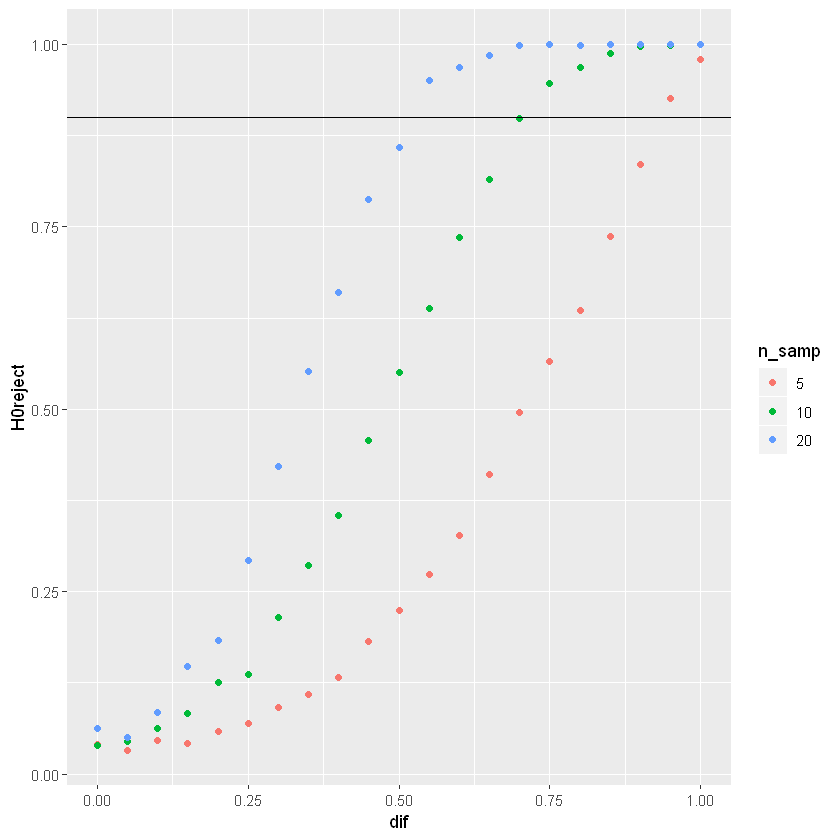

In [201]:
ggplot(df,aes(x=dif,y=H0reject,color=n_samp)) + 
    geom_point() + 
    geom_hline(yintercept=.9)



In [90]:
require(pwr)

Loading required package: pwr


In [110]:
?apply